In [1]:
#1
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\mamid\OneDrive\Desktop\MACHINE LEARNING LAB\extracted_features_charrec.csv")

# Define initial weights and learning rate
weight_0 = 10
weight_1 = 0.2
weight_2 = -0.75
learning_rate = 0.05
X = df.drop(columns=['class_name']) 
y = df['class_name']  

# Training data for the AND gate
# AND gate truth table:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Define the activation function
def activation_function(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            input_1, input_2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * input_1 + weights[2] * input_2
            # Calculate the error
            error = target - activation_function(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * input_1
            weights[2] += learning_rate * error * input_2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([weight_0, weight_1, weight_2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"Weight 0: {trained_weights[0]}, Weight 1: {trained_weights[1]}, Weight 2: {trained_weights[2]}")

# Test the perceptron accuracy
def test_perceptron_accuracy(weights, data):
    correct = 0
    for i in range(len(data)):
        input_1, input_2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * input_1 + weights[2] * input_2
        prediction = activation_function(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({input_1}, {input_2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron accuracy
print("\nTesting the Trained Perceptron:")
test_perceptron_accuracy(trained_weights, inputs)


Trained Weights:
Weight 0: 1.6999999999999933, Weight 1: -1.6000000000000008, Weight 2: -1.6000000000000005

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 0.0%


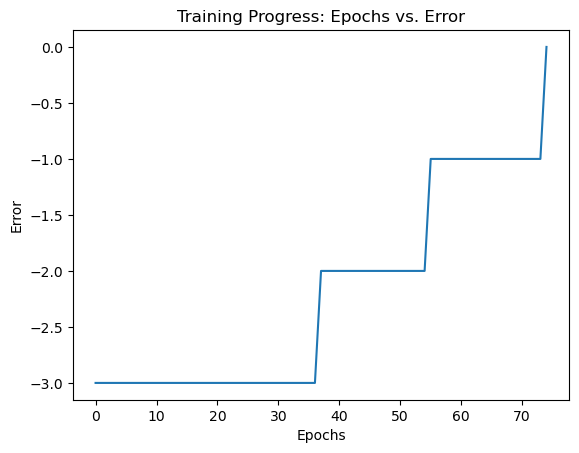

In [2]:
# Create a plot of the training progress
import matplotlib.pyplot as plt
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Progress: Epochs vs. Error')
plt.show()


Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: 4.45599999999996, W1: -1.6440000000000101, W2: -2.7940000000000103

Testing the Trained Perceptron:
Number of Iterations to Converge: 100


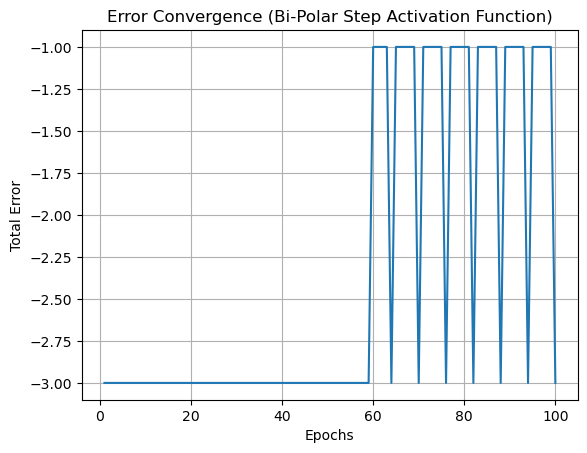


Training with Sigmoid Activation Function:
Trained Weights:
W0: 3.711416782721327, W1: -3.216236073917517, W2: -3.9941771366307037

Testing the Trained Perceptron:
Number of Iterations to Converge: 100


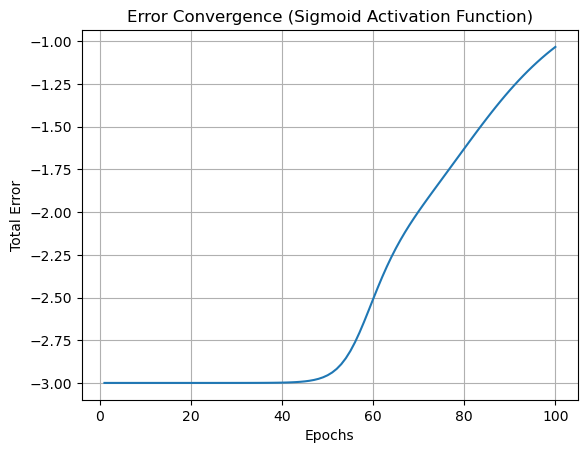


Training with ReLU Activation Function:
Trained Weights:
W0: 0.13041824767142174, W1: 0.2583091335417361, W2: 0.17767206025917628

Testing the Trained Perceptron:
Number of Iterations to Converge: 100


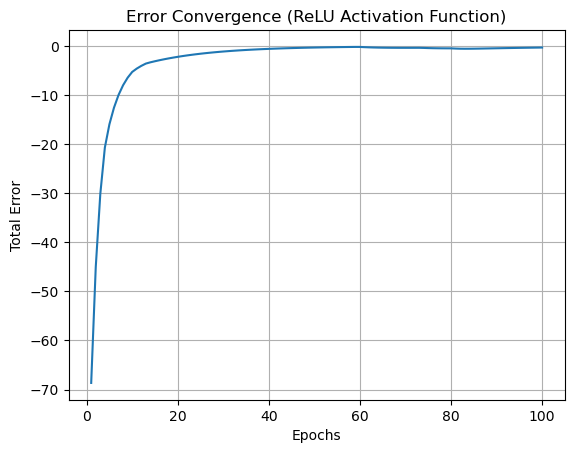

In [5]:
#2
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
W0 = 20
W1 = 0.5
W2 = -0.65
learning_rate = 0.067

# Training data for the AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    print("\nTesting the Trained Perceptron:")
    # (You should define and call the 'test_perceptron' function here)
    
    print(f"Number of Iterations to Converge: {len(error_values)}")

    # Plot the error convergence
    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()


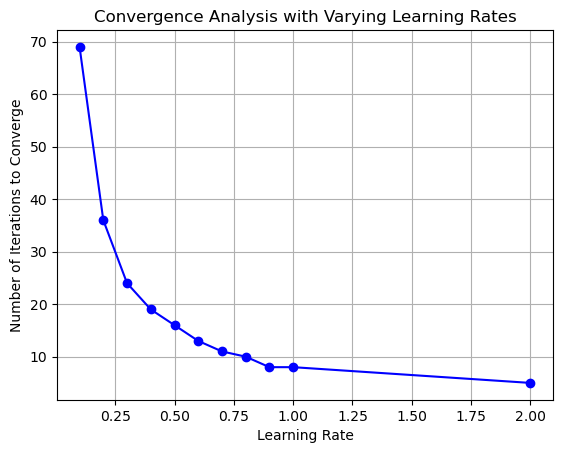

In [6]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 20
W1 = 0.5
W2 = -0.65
X = df.drop(columns=['class_name']) 
y = df['class_name'] 

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2]
iteration_counts = []  # To store the number of iterations for each learning rate

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    # Train the perceptron and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()


In [8]:
#4
import numpy as np

# Define initial weights and learning rate
W0 = 20
W1 = 0.5
W2 = -0.65
learning_rate = 0.067

# Load the data (replace with your file paths)
X = df.drop(columns=['class_name']) 
y = df['class_name'] 

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: 8.34199999999997, W1: -4.458000000000005, W2: -5.608000000000008

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 75.0%



Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: 9.979999999999997, W1: -2.84, W2: -3.99

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 1
Accuracy: 50.00%


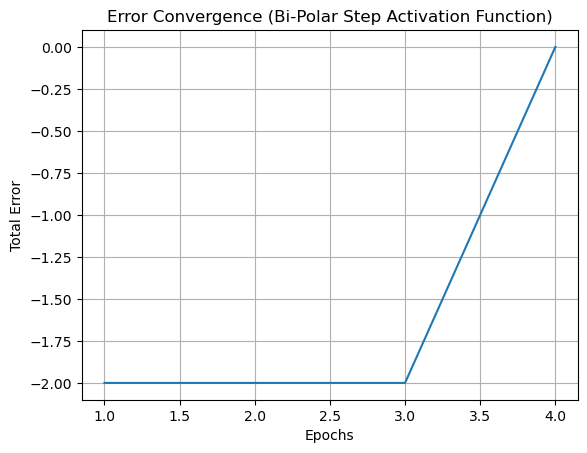


Training with Sigmoid Activation Function:
Trained Weights:
W0: 1.3171374505827083, W1: -2.6342748957014064, W2: -1.317137449178007

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 0.7887050586533371
Input: (0, 1), Target: 1, Prediction: 0.5000000003511753
Input: (1, 0), Target: 1, Prediction: 0.21129494225723688
Input: (1, 1), Target: 0, Prediction: 0.0669648578194337
Accuracy: 0.00%


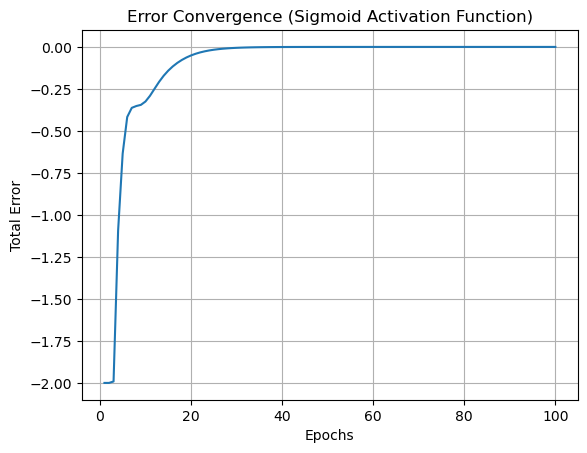


Training with ReLU Activation Function:
Trained Weights:
W0: 2.8541084250494353, W1: -2.2941278748942415, W2: -2.1382075663810665

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 2.8541084250494353
Input: (0, 1), Target: 1, Prediction: 0.7159008586683688
Input: (1, 0), Target: 1, Prediction: 0.5599805501551938
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 25.00%


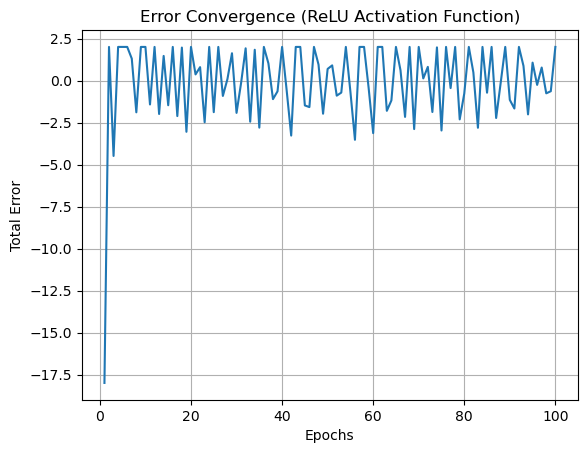

In [12]:
#4
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
W0 = 20
W1 = 0.5
W2 = -0.65
learning_rate = 1.67

# Training data for XOR gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    # Test the trained perceptron
    print("\nTesting the Trained Perceptron:")
    correct = 0
    for i in range(len(inputs)):
        x1, x2 = inputs[i]
        target = targets[i]
        weighted_sum = trained_weights[0] + trained_weights[1] * x1 + trained_weights[2] * x2
        prediction = activation_fn(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    
    accuracy = (correct / len(inputs)) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Plot the error convergence
    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()


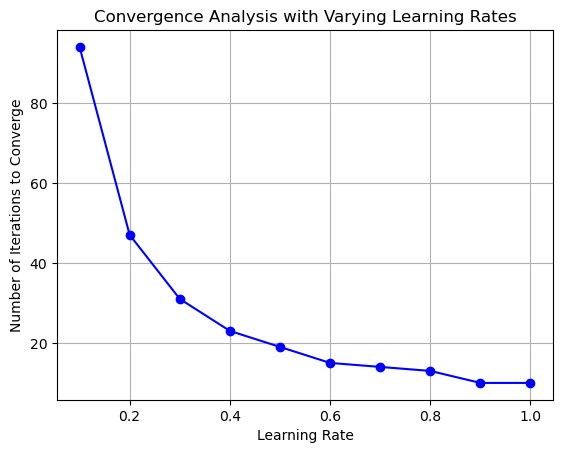

In [13]:
#4
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 20
W1 = 0.5
W2 = -0.65


X = df.drop(columns=['class_name']) 
y = df['class_name'] 

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = []  # To store the number of iterations for each learning rate

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    # Train the perceptron and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()


In [14]:
#5
import numpy as np
# Define initial weights and learning rate
W0 = 0.7
W1 = 0.8
W2 = 0.2
W3 = 0.9
learning_rate = 0.5

# Training data
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Target values (High Value or Low Value)
targets = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(x1, x2, x3, x4):
    weighted_sum = W0 + W1 * x1 + W2 * x2 + W3 * x3
    return sigmoid(weighted_sum)

def train_perceptron(max_epochs, data, targets):
    global W0, W1, W2, W3  # Declare global variables
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2, x3, x4 = data[i]
            target = targets[i]
            prediction = predict(x1, x2, x3, x4)
            error = target - prediction
            total_error += error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2
            W3 += learning_rate * error * x3
        if total_error == 0:
            break

# Train the perceptron
train_perceptron(1000, data, targets)

# Test the perceptron and print the results
for i in range(len(data)):
    x1, x2, x3, x4 = data[i]
    prediction = predict(x1, x2, x3, x4)
    classification = "High_Value" if prediction >= 0.5 else "Low_Value"
    print(f"Customer C_{i + 1}: {classification}")


Customer C_1: High_Value
Customer C_2: High_Value
Customer C_3: High_Value
Customer C_4: Low_Value
Customer C_5: High_Value
Customer C_6: Low_Value
Customer C_7: High_Value
Customer C_8: High_Value
Customer C_9: Low_Value
Customer C_10: Low_Value


In [15]:
#6
# Calculate the pseudo-inverse of the data
pseudo_Inverse = np.linalg.pinv(data)
print("Pseudo Inverse is",pseudo_Inverse)

Pseudo Inverse is [[-0.01158602 -0.03328061  0.00992701  0.0309081   0.01893411  0.01257157
  -0.00872551  0.00049436  0.01868374 -0.00579619]
 [ 0.00809324 -0.03931864  0.02004214  0.01022259  0.01645572 -0.01682076
   0.00109285  0.00621381 -0.00780631 -0.0171085 ]
 [-0.02400235  0.12210231 -0.06177958 -0.03305478 -0.05136901  0.05064536
  -0.00279828 -0.01898852  0.02274531  0.05261889]
 [ 0.00150006  0.00203556  0.00021249 -0.0018353  -0.00064341 -0.00095362
   0.00101203  0.00046022 -0.00124752  0.00037604]]
